In [521]:
# Importing the Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [522]:
# Importing the dataset
df = pd.read_csv('bank-marketing (1).csv')

In [523]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [524]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [525]:
df.describe(include=object)

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,2,3,12,4,2
top,blue-collar,married,secondary,yes,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,37091,44396,25130,37967,29285,13766,36959,39922


In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age          45211 non-null int64
job          45211 non-null object
salary       45211 non-null int64
marital      45211 non-null object
education    45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45211 non-null object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [527]:
# lets look at the value count for the target variable response
df['response'].value_counts()

no     39922
yes     5289
Name: response, dtype: int64

###### the respnse class looks imbalanced, though decision tree, Random forest and Logistic regression do not get much effected with class imbalance but this could cause issue with other algorithmns as well as them if imbalance is also for independent variables. Hence we can use SMOTE to balance the class towards the end

### Now lets explore the variables and do some cleaning as required

In [528]:
#create a new dataframe with only the numeric variables
df_num= df.select_dtypes(exclude=object)

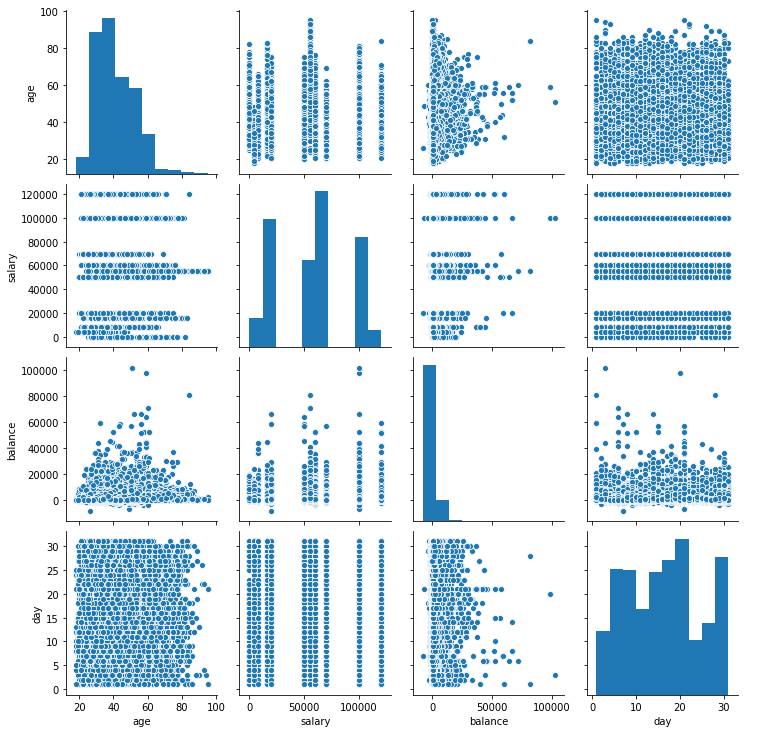

In [529]:
# looking at the distribution and correlation of individual as well as with other numeric variables
sns.pairplot(df_num.iloc[:,:4])

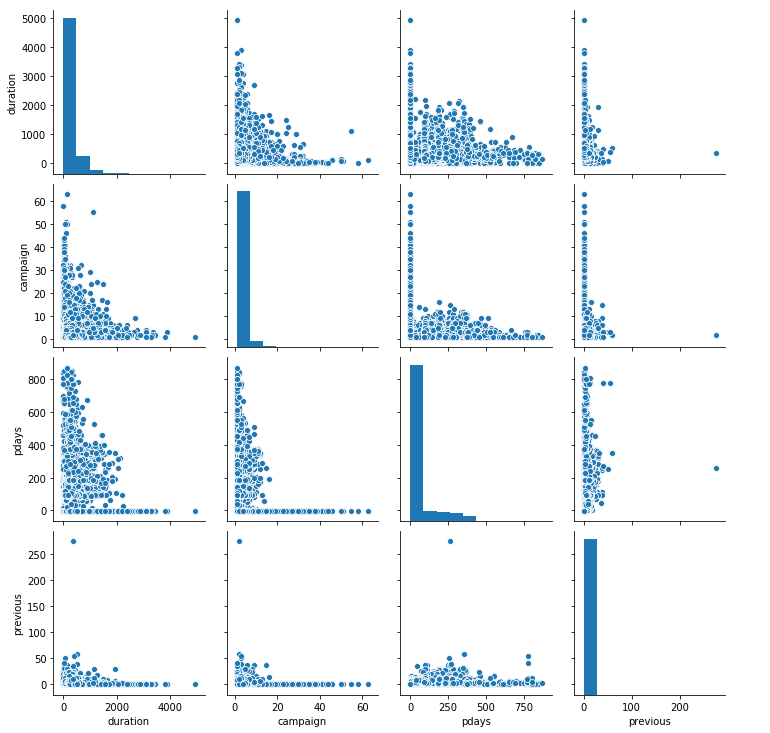

In [530]:
sns.pairplot(df_num.iloc[:,4:8])

In [531]:
# lets now visualize the categorical variables
cat_df=df.select_dtypes(include=['object']).columns.tolist()

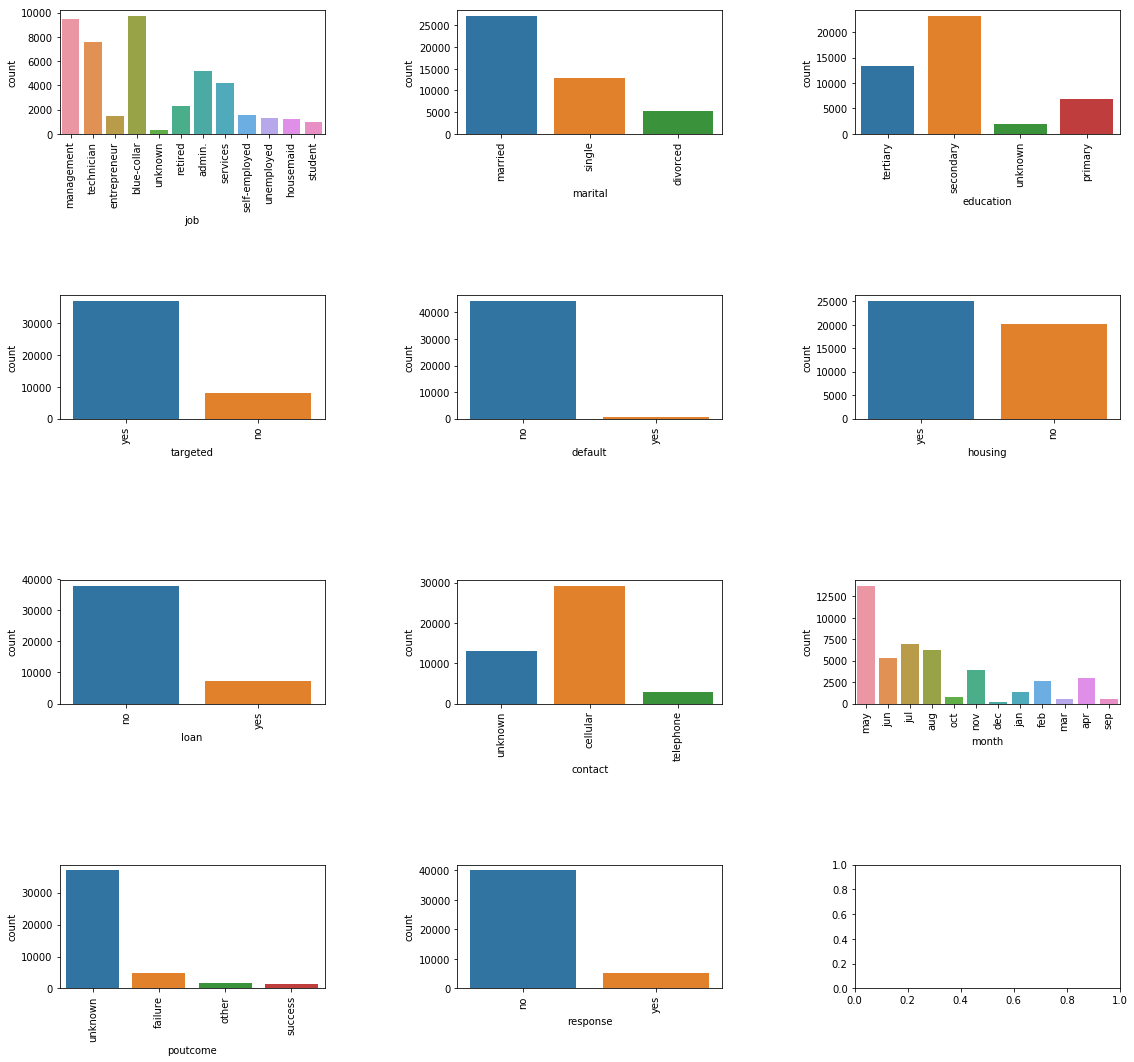

In [532]:
fig, ax = plt.subplots(4,3, figsize=(19, 18))
fig.subplots_adjust(hspace=1.3, wspace=0.5)
for variable, subplot in zip(cat_df, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [533]:
# Lets first look at the pday variable
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

#### 75% values are -1 i.e they are previously not contacted lot of difference between mean(40) and median(-1)

In [534]:
# looking at previously contacted description
prev_contacted= df[df['pdays'] >= 0]

In [535]:
prev_contacted.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [536]:
# looking at previously not contacted description
prev_Ncontacted= df[df['pdays'] < 0]

In [537]:
prev_Ncontacted.pdays.describe()

count    36954.0
mean        -1.0
std          0.0
min         -1.0
25%         -1.0
50%         -1.0
75%         -1.0
max         -1.0
Name: pdays, dtype: float64

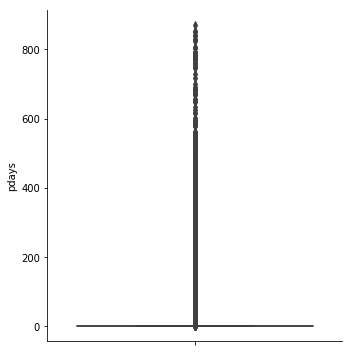

In [538]:
# box plot for pdays
sns.catplot(y= 'pdays',data=df, kind='box')

In [539]:
# previous connected response count
prev_contacted['response'].value_counts()

no     6352
yes    1905
Name: response, dtype: int64

In [540]:
# previous not connected response count
prev_Ncontacted['response'].value_counts()

no     33570
yes     3384
Name: response, dtype: int64

In [541]:
# previous connected previous coutcome count
prev_contacted['poutcome'].value_counts()

failure    4901
other      1840
success    1511
unknown       5
Name: poutcome, dtype: int64

In [542]:
# crosstabulation of previous connected response and poutcome
pd.crosstab(prev_contacted.poutcome, prev_contacted.response)

response,no,yes
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,3,2


In [543]:
# crosstabulation of previous connected response and poutcome
pd.crosstab(prev_Ncontacted.poutcome, prev_Ncontacted.response)

response,no,yes
poutcome,,
unknown,33570,3384


In [544]:
df.response.value_counts(normalize=True)
df.replace({'response': {"yes": 1,'no':0}},inplace=True)

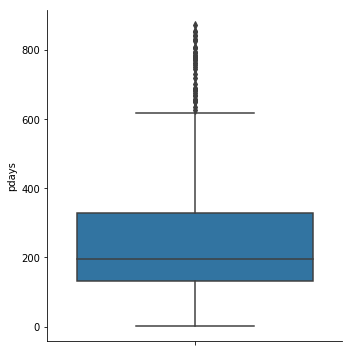

In [545]:
sns.catplot(y= 'pdays',data=prev_contacted, kind='box')

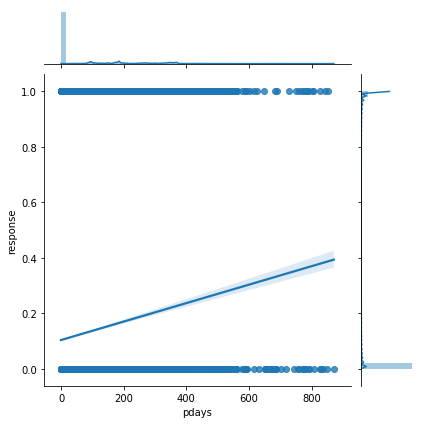

In [546]:
sns.jointplot(x = df['pdays'] ,y = df["response"],kind='reg')

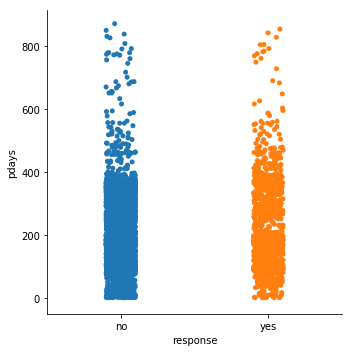

In [547]:
sns.catplot(x= 'response', y='pdays',data=prev_contacted)

#### looking at all the plots we can conclude that pday has significance to predict the response variable and pday has 75% of values as -1(not contacted before customers) and for the same we have the poutcome(previous campaign as unknown as well

#### As a solution what we can do is replace the pday numeric variable with categorical variable with the following categories

pday_NAN - -1

pday_btw-1_80 - -1-80

pday_btw80_200 - 80-200

pday_btw200-300 - 200-300

pday_above300 - > 300

In [548]:
bins= [-2,1, 80, 200, 300, np.inf]
names= ['pday_NAN', 'pday_btw-1_80', 'pday_btw80_200', 'pday_btw200-300', 'pday_above300']
df['pdays']= pd.cut(df['pdays'], bins, labels=names)

In [549]:
df.pdays.value_counts()

pday_NAN           36969
pday_btw80_200      3869
pday_above300       2470
pday_btw200-300     1484
pday_btw-1_80        419
Name: pdays, dtype: int64

In [550]:
# lets look at the value counts for poutcome varaible
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [551]:
# we can replace the other to group it under unknowns
df.poutcome=df.poutcome.replace(['other'], ['unknown'])

In [552]:
# lets look at the age variable as that can be binned as well
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

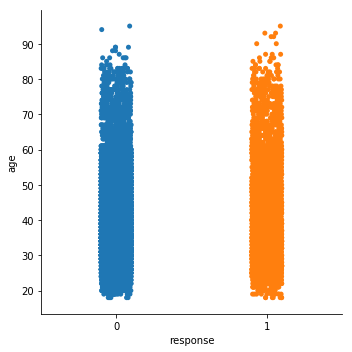

In [553]:
sns.catplot(y='age', x= 'response', data = df )

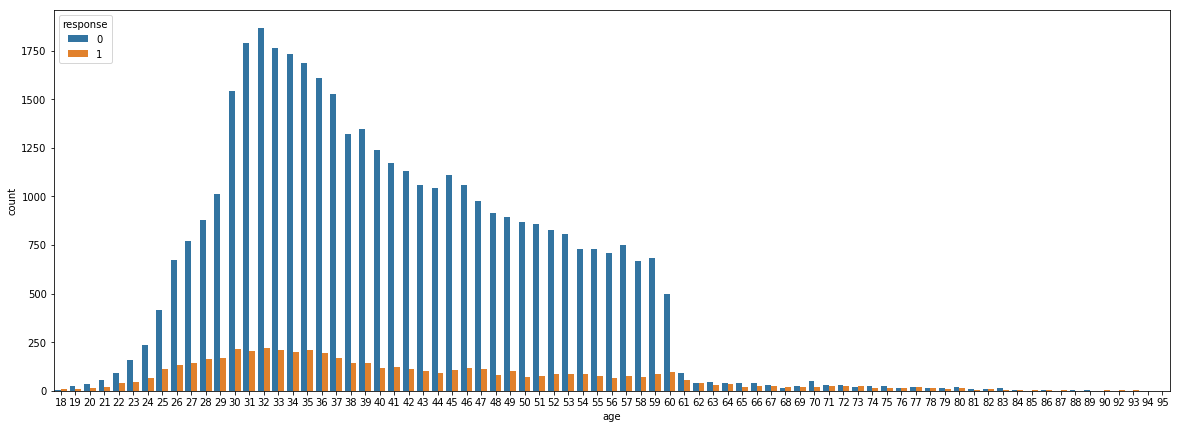

In [554]:
plt.figure(figsize=(20,7))
sns.countplot(x="age",data=df,hue="response")
plt.show()

#### looks like people of all ages have subscribed hence we can bin and not remove outliers as they can be valueable for prediction


In [555]:
bins= [15,28, 38, 50, 60, np.inf]
names= ['below_28', '28_38', '38_50', '50_60', '60+']
df['age']= pd.cut(df['age'], bins, labels=names)

In [556]:
# convert to object type from category
df= df.astype({'pdays': 'object', 'age': 'object'})

In [557]:
# duration needs to be removed as this really impacts the target variable as after a call we would definetly know the response
df.drop(['duration'], axis=1, inplace=True)

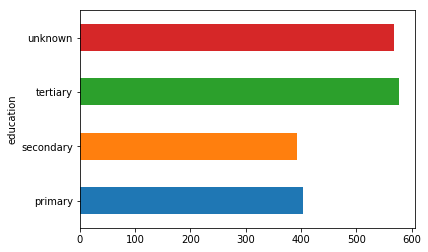

In [558]:
df.groupby(['education'])['balance'].median().plot.barh()

what we can do is move all unknowns under

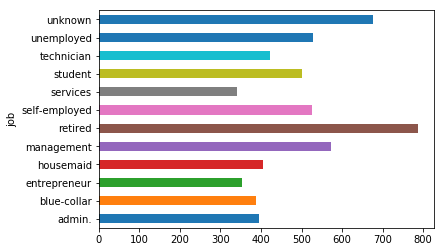

In [559]:
df.groupby(['job'])['balance'].median().plot.barh()

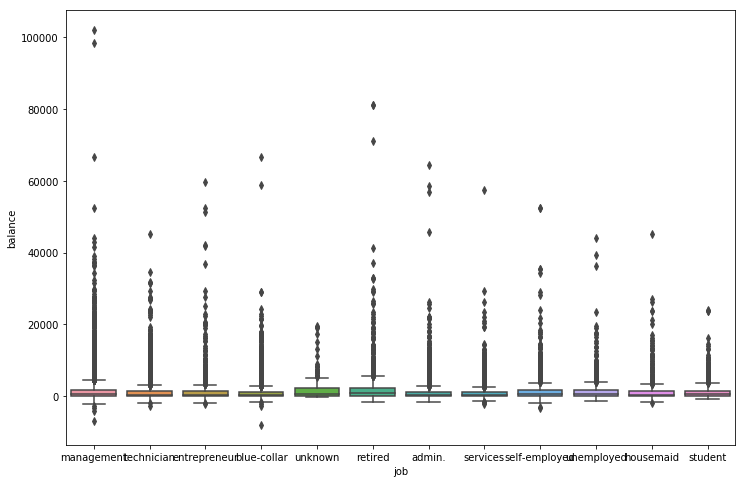

In [560]:
plt.figure(figsize=(12,8))
sns.boxplot(x='job', y='balance', data=df)

In [561]:
# here we are seperating object and numerical data types 
obj_col = []
num_col = []
for col in df.columns:
    if df[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

In [562]:
print("Object data type features ",obj_col)
print("Numerical data type features ",num_col)

Object data type features  ['age', 'job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'pdays', 'poutcome']
Numerical data type features  ['salary', 'balance', 'day', 'campaign', 'previous', 'response']


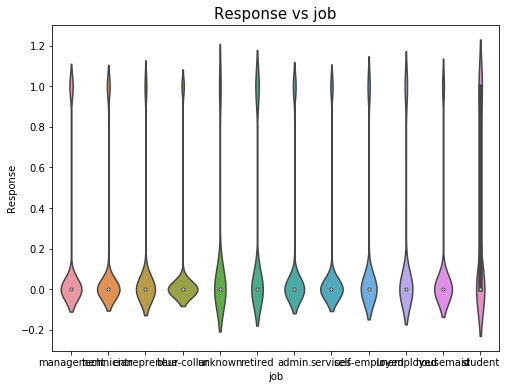

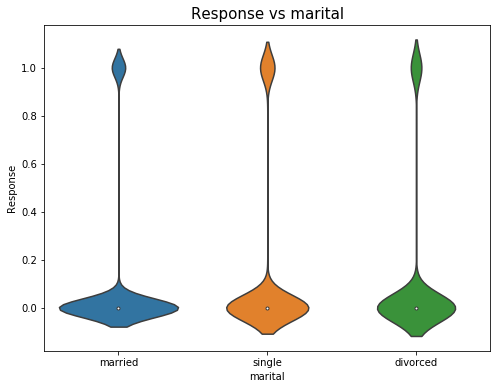

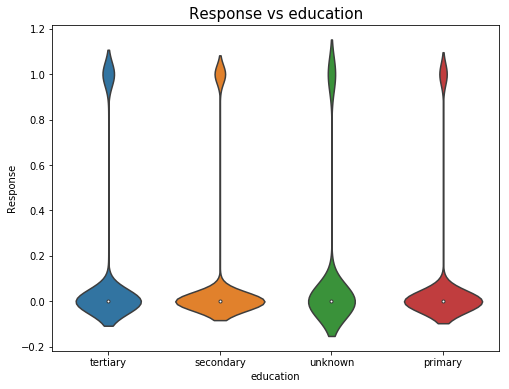

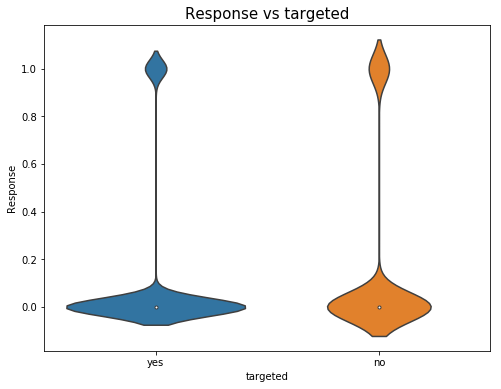

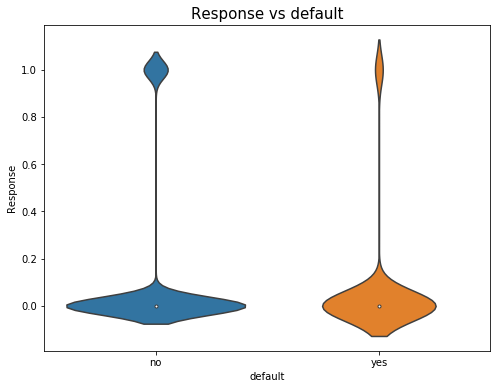

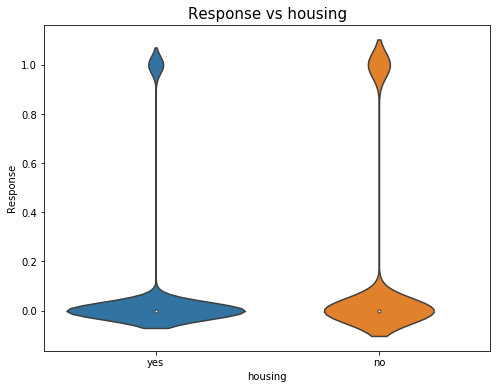

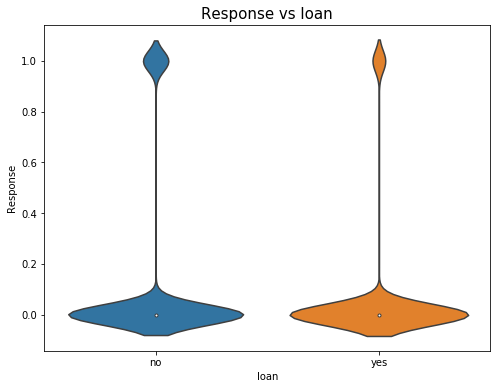

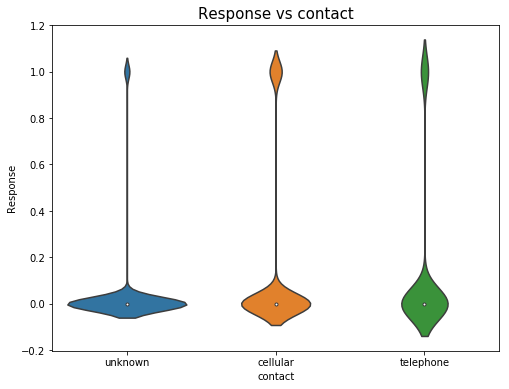

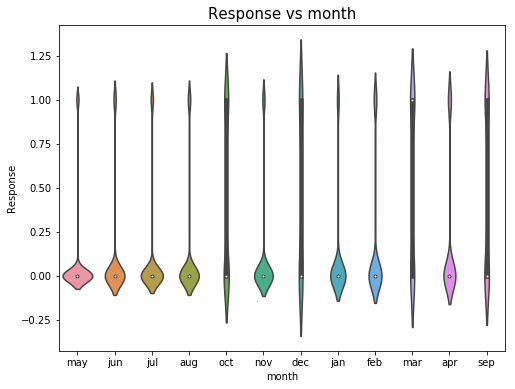

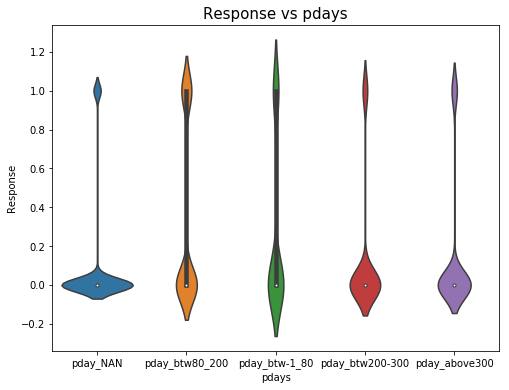

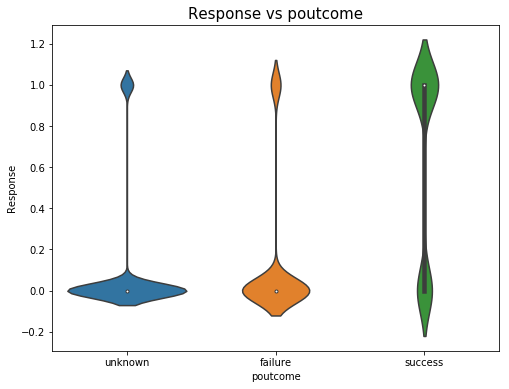

In [563]:
from numpy import median
# lets look at the categorical variables against the response
for col in obj_col[1:]:
    plt.figure(figsize=(8,6))
    sns.violinplot(df[col],df["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()

<Figure size 720x576 with 0 Axes>

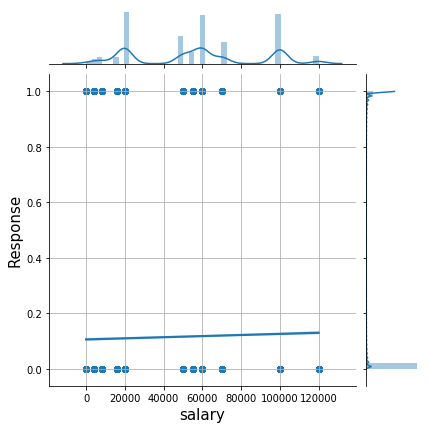

<Figure size 720x576 with 0 Axes>

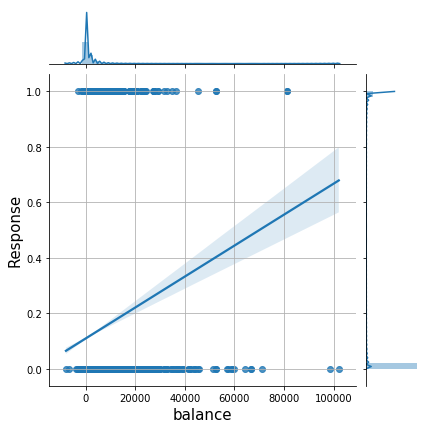

<Figure size 720x576 with 0 Axes>

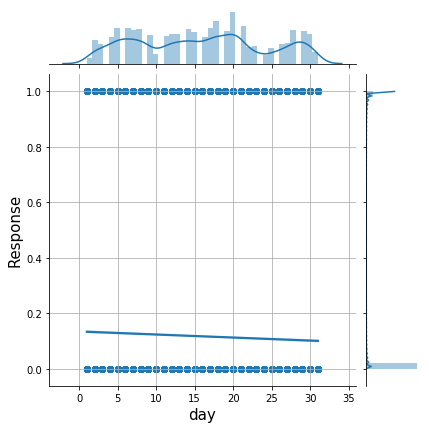

<Figure size 720x576 with 0 Axes>

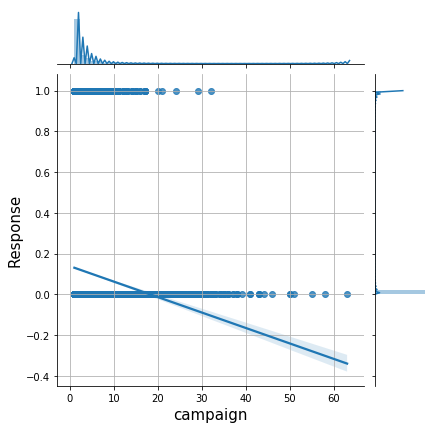

<Figure size 720x576 with 0 Axes>

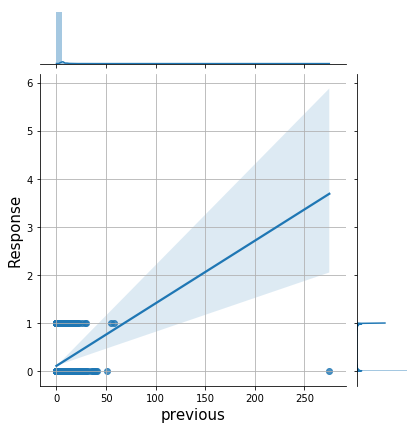

In [564]:
# lets look at the numeric variables against the response
for col in num_col[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df[col],y = df["response"],kind='reg')
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

#### Need to look at previous, campaign and day

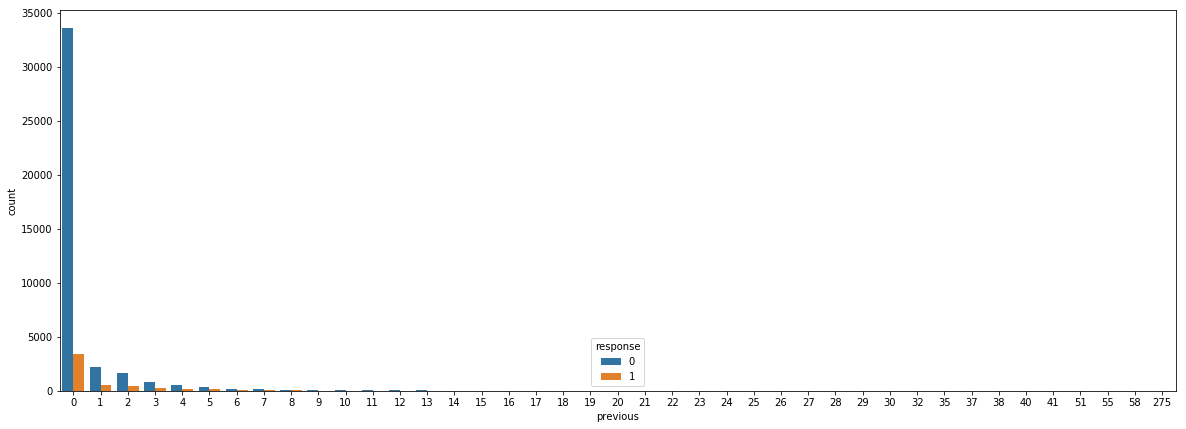

In [565]:
plt.figure(figsize=(20,7))
sns.countplot(x="previous",data=df,hue="response")
plt.show()

In [566]:
df['previous'][df['previous'] > 0] .describe()

count    8257.000000
mean        3.177546
std         4.560820
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       275.000000
Name: previous, dtype: float64

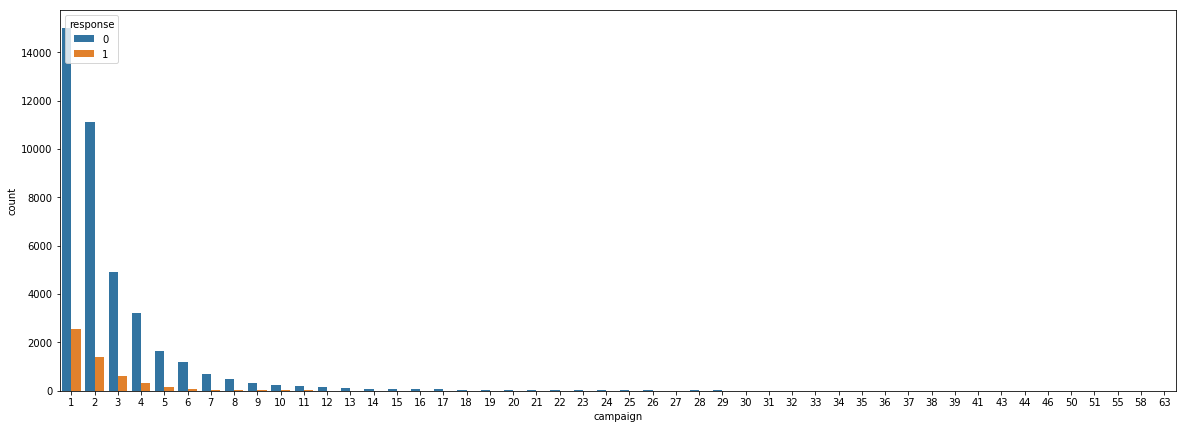

In [567]:
plt.figure(figsize=(20,7))
sns.countplot(x="campaign",data=df,hue="response")
plt.show()

In [568]:
df['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

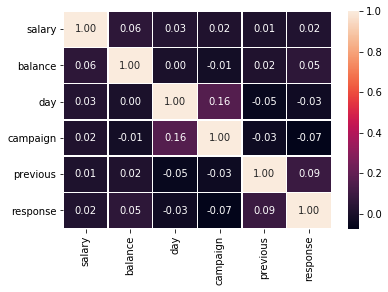

In [569]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=.5)

#### day, month, targeted, salary needs to be droped as they do not provide much inference

#### previous and campaign needs to be converted to on=bject type with categories as previous most of the customers are not contacted and are new customers also both variables are nominal

In [570]:
bins= [-1,0.5,2.5, 5,np.inf]
names= ['not_contacted', '0-2_times', '2-5_times', '5+']
df['previous']= pd.cut(df['previous'], bins, labels=names)

In [571]:
bins= [0,1.5,2.5, 3.5,np.inf]
names= ['once', '2-time', '3-time', '3+']
df['campaign']= pd.cut(df['campaign'], bins, labels=names)

In [572]:
#convert to object type
df= df.astype({'previous': 'object', 'campaign': 'object'})

In [573]:
# drop unnecessory columns as discussed
df.drop(['day', 'month', 'targeted', 'salary'], axis=1, inplace=True)

In [574]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,response
0,50_60,management,married,tertiary,no,2143,yes,no,unknown,once,pday_NAN,not_contacted,unknown,0
1,38_50,technician,single,secondary,no,29,yes,no,unknown,once,pday_NAN,not_contacted,unknown,0
2,28_38,entrepreneur,married,secondary,no,2,yes,yes,unknown,once,pday_NAN,not_contacted,unknown,0
3,38_50,blue-collar,married,unknown,no,1506,yes,no,unknown,once,pday_NAN,not_contacted,unknown,0
4,28_38,unknown,single,unknown,no,1,no,no,unknown,once,pday_NAN,not_contacted,unknown,0


In [575]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'campaign', 'pdays', 'previous', 'poutcome',
       'response'],
      dtype='object')>

In [576]:
# convert to dummy variables
dummy_var= pd.get_dummies(df[['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'campaign', 'pdays', 'previous', 'poutcome']], drop_first=True)

In [577]:
num_df=df[['balance', 'response']]

In [578]:
final_df= pd.concat([dummy_var,num_df], axis=1)

In [579]:
final_df.head()

,age_38_50,age_50_60,age_60+,age_below_28,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,pdays_pday_btw-1_80,pdays_pday_btw200-300,pdays_pday_btw80_200,previous_2-5_times,previous_5+,previous_not_contacted,poutcome_success,poutcome_unknown,balance,response
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,2143,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,29,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,2,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1506,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [580]:
# splitting into predictor and target variables
X = final_df.drop("response", axis=1)
y= final_df[['response']]

In [581]:
#Import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
np.random.seed(42)

In [582]:
# scaling the Balance variable
X['balance'] = scaler.fit_transform(df[['balance']]).reshape(-1,1)

#### Getting the top 15 features using Recurssive feature elimination RFE

In [583]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

rfc = RandomForestClassifier(n_estimators=40)
rfe = RFE(rfc, 15)
rfe_fit = rfe.fit(X, y)

print("Num Features: %s" % (rfe_fit.n_features_))
print("Selected Features: %s" % (X.columns[rfe_fit.support_]))
print("Feature Ranking: %s" % (rfe_fit.ranking_))

Num Features: 15
Selected Features: Index(['age_38_50', 'age_50_60', 'age_60+', 'job_management', 'job_technician',
       'marital_married', 'education_secondary', 'housing_yes', 'loan_yes',
       'contact_unknown', 'campaign_once', 'pdays_pday_btw80_200',
       'poutcome_success', 'poutcome_unknown', 'balance'],
      dtype='object')
Feature Ranking: [ 1  1  1  6  7 18 19  1 17 14 11 21  1 12 24  1  9  1  4 13 23  1  1  3
  1  8  2  1 15 22 20  1  5 16 10  1  1  1]


In [584]:
# getting the final variables to be used
cols = X.columns[rfe.support_]
X= X[cols]

#### As we know that our data is unbalanced, hence to address the issue we will use SMOTE - Synthetic Minority Oversampling Technique

##### This is an oversampling technique in which instead of randomly repeating minority 'yes' category, new entires are sythetically created maintaining the convexity of minority entry space. Minority category will again match the majority category samples.

In [585]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(ratio='auto', kind='regular')
X_sampled,y_sampled=sm.fit_sample(X,y)

In [586]:
X_sampled= pd.DataFrame(X_sampled)
y_sampled= pd.DataFrame(y_sampled)

In [587]:
# rename the columns
X_sampled.columns = ['age_38_50', 'age_50_60', 'age_60+', 'job_management', 'job_technician',
       'marital_married', 'education_secondary', 'housing_yes', 'loan_yes',
       'contact_unknown', 'campaign_once', 'pdays_pday_btw80_200',
       'poutcome_success', 'poutcome_unknown', 'balance']

In [588]:
# rename the columns
y_sampled.columns = ['response']

In [589]:
Sampled_no = len(y_sampled[y_sampled==0])
Sampled_yes = len(y_sampled[y_sampled==1])
print([Sampled_no],[Sampled_yes])

[79844] [79844]


In [590]:
# do the train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sampled,y_sampled,test_size=0.3,random_state=42)

#### Applying the Logistic regression algorithm

In [591]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

In [592]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [593]:
y_pred = lr.predict(X_test)
f1_score(y_pred,y_test)

0.6725219573400251

In [594]:
confusion_matrix(y_pred,y_test)

array([[8613, 4209],
       [3360, 7772]], dtype=int64)

#### lets now filter features even more using VIF

In [595]:
# lets now filter features even more using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [598]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

,Features,VIF
14,balance,1.04
8,loan_yes,1.18
2,age_60+,1.25
4,job_technician,1.27
1,age_50_60,1.42
9,contact_unknown,1.46
3,job_management,1.59
0,age_38_50,1.64
10,campaign_once,1.69
12,poutcome_success,1.91


#### Random Forest Classifier

In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)
rfc.fit(X_train,y_train)

In [601]:
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

0.7053139366798498

In [602]:
y_pred1 = rfc.predict(X_test)

In [603]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71     11973
           1       0.71      0.70      0.70     11981

   micro avg       0.71      0.71      0.71     23954
   macro avg       0.71      0.71      0.71     23954
weighted avg       0.71      0.71      0.71     23954



In [604]:
f1_score(y_test,y_pred1)

0.7035052937950816

In [605]:
confusion_matrix(y_test,y_pred1)

array([[8586, 3387],
       [3642, 8339]], dtype=int64)

In [607]:
from sklearn.metrics import roc_auc_score

In [608]:
roc_auc_score(y_test,y_pred1)

0.7065661008281069